In [1]:
import mindspore.numpy as np
import mindspore

In [2]:
#实验2.1 线性回归——面积-房价预测
#输入对应大小，x表示为房屋面积、y为房价
x=np.array([56,72,69,88,102,86,76,79,94,74]).asnumpy()
y=np.array([92,102,86,110,130,99,96,102,105,92]).asnumpy()

Text(0, 0.5, 'Price')

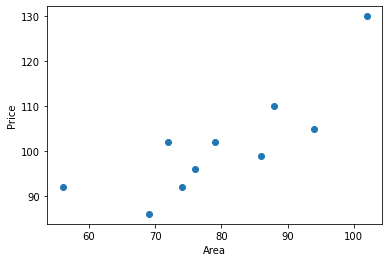

In [3]:
import numpy as np
from matplotlib import pyplot as plt
#绘制图像
plt.scatter(x,y)
plt.xlabel('Area')#面积
plt.ylabel('Price')#房价

In [4]:
#一元回归
def f(x,w0,w1):
    y=w0+w1*x
    return y

In [5]:
#平方损失函数
def square_loss(x,y,w0,w1):
    loss=sum(np.square(y-(w0+w1*x)))
    return loss

In [6]:
#w的计算方式
def w_calculator(x,y):
    n=len(x)
    w1 = (n * sum(x * y) - sum(x) * sum(y)) / (n * sum(x * x) - sum(x) * sum(x))
    w0 = (sum(x * x) * sum(y) - sum(x) * sum(x * y)) / (n * sum(x * x) - sum(x) * sum(x))

    return w0,w1

In [7]:
w_calculator(x,y)


(41.33509168550616, 0.7545842753077117)

In [8]:
#第一种方法 最小二乘代数解
w0,w1=w_calculator(x,y)
square_loss(x,y,w0,w1)

447.69153479025357

154.5227329816629

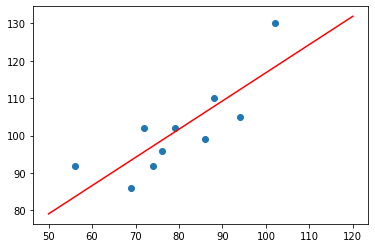

In [9]:

x_temp=np.linspace(50,120,100)
plt.scatter(x,y)
plt.plot(x_temp,x_temp*w1+w0,'r')
f(150,w0,w1)


In [10]:
#第二种方法：sklearn 线性回归实现
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x.reshape(len(x),1),y)
print(model.intercept_,model.coef_)


41.33509168550615 [0.75458428]


154.5227329816629

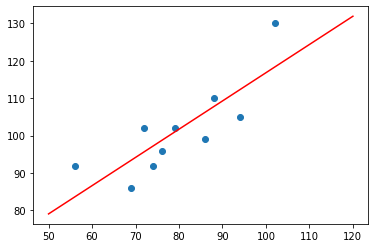

In [11]:
x_temp=mindspore.numpy.linspace(50,120,100).asnumpy()
x=mindspore.numpy.array([56,72,69,88,102,86,76,79,94,74]).asnumpy()
y=mindspore.numpy.array([92,102,86,110,130,99,96,102,105,92]).asnumpy()
plt.scatter(x,y)
plt.plot(x_temp,x_temp*model.coef_+model.intercept_,'r')
f(150,w0,w1)

In [12]:
#第三种方法 最小二乘矩阵实现
def w_matrix(x,y):
    w=(x.T*x).I*x.T*y
    return w

In [13]:
#计算w
x=np.matrix([[1,56],[1,72],[1,69],[1,88],[1,102],
             [1,86],[1,76],[1,94],[1,79],[1,74]])
y=np.matrix([92,102,86,110,130,99,96,102,105,92])
w=w_matrix(x,y.reshape(10,1))
print(w)

[[43.5845265 ]
 [ 0.72632504]]


154.5227329816629

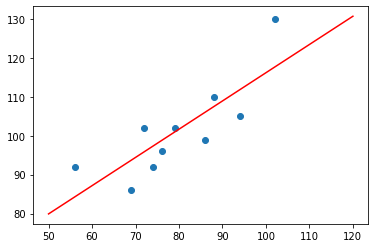

In [15]:
x_temp=mindspore.numpy.linspace(50,120,100).asnumpy()
x=mindspore.numpy.array([56,72,69,88,102,86,76,79,94,74]).asnumpy()
y=mindspore.numpy.array([92,102,86,110,130,99,96,102,105,92]).asnumpy()
plt.scatter(x,y)
plt.plot(x_temp,x_temp*0.72632504+43.5845265 ,'r')
f(150,w0,w1)

In [ ]:
#试验结束